In [1]:
!unrar x task_2_data.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from task_2_data.rar


Would you like to replace the existing file task_2_data/orders.csv
4823287 bytes, modified on 2023-04-01 04:56
with a new one
4823287 bytes, modified on 2023-04-01 04:56

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit n


Would you like to replace the existing file task_2_data/payments.csv
6046283 bytes, modified on 2023-04-01 04:56
with a new one
6046283 bytes, modified on 2023-04-01 04:56

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit n


Would you like to replace the existing file task_2_data/plan.csv
13286025 bytes, modified on 2023-04-01 04:56
with a new one
13286025 bytes, modified on 2023-04-01 04:56

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit n

All OK


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
orders = pd.read_csv('task_2_data/orders.csv', parse_dates=['created_at', 'put_at', 'closed_at'])
plan = pd.read_csv('task_2_data/plan.csv', parse_dates=['plan_at'])
payments = pd.read_csv('task_2_data/payments.csv', parse_dates=['paid_at'])

In [4]:
orders.head()

,order_id,created_at,put_at,closed_at,issued_sum
0,400001732,2022-06-02 00:00:23.997,2022-06-02 20:18:00.180,2022-10-17 11:52:22.190,13600.0
1,400005838,2022-06-02 00:10:22.997,2022-06-02 15:41:33.267,2022-06-02 17:38:43.917,20000.0
2,400007915,2022-06-02 00:18:04.000,2022-06-05 19:17:38.547,2022-06-21 21:55:51.877,5820.0
3,400008952,2022-06-02 00:22:07.000,2022-06-03 14:25:18.033,2022-07-12 10:47:46.307,9000.0
4,400009027,2022-06-02 00:25:39.000,2022-06-02 00:40:40.320,2022-06-22 14:15:07.423,5000.0


In [5]:
plan.head()

,order_id,plan_at,plan_sum_total
0,400001732,2022-06-02,5600.0
1,400001732,2022-07-02,9450.0
2,400001732,2022-08-01,12170.0
3,400001732,2022-08-31,14890.0
4,400001732,2022-09-30,17610.0


In [6]:
payments.head()

,order_id,paid_at,paid_sum
0,400013633,2022-06-02 00:48:13.800,2500.0
1,400018480,2022-06-02 01:52:05.707,1070.0
2,400032001,2022-06-02 04:55:40.307,4200.0
3,400033195,2022-06-02 05:44:23.480,2850.0
4,400039407,2022-06-02 06:53:54.503,10100.0


In [7]:
orders.shape, plan.shape, payments.shape

((55748, 5), (420282, 3), (143284, 3))

Проверим на наличие пропусков

In [8]:
orders.isna().sum()

,0
order_id,0
created_at,0
put_at,0
closed_at,9276
issued_sum,0


Много пропусков в `closed_at` можно объяснить тем, что на момент 08.12.2022 не все кредиты закрыты. Необходимо это учитывать в дальнейшем анализе

In [9]:
plan.isna().sum()

,0
order_id,0
plan_at,0
plan_sum_total,0


In [10]:
payments.isna().sum()

,0
order_id,0
paid_at,0
paid_sum,0


Проверим, что нет ошибок в датах (что кредит не выдали до создания заявки и не выдали после закрытия)

In [11]:
orders_check = orders.copy()
orders_check['created_put_diff'] = (orders_check['put_at'] - orders_check['created_at']).dt.days
orders_check['put_closed_diff'] = (orders_check['closed_at'] - orders_check['put_at']).dt.days

invalid_dates = orders_check[
    (orders_check['created_put_diff'] < 0) |
    (orders_check['put_closed_diff'] < 0)
]
invalid_dates

,order_id,created_at,put_at,closed_at,issued_sum,created_put_diff,put_closed_diff
10292,417505748,2022-06-18 16:48:56.997,2022-06-18 00:00:00.000,2022-09-25 16:21:48.107,5430.0,-1,99.0
19860,434222763,2022-07-04 23:58:08.000,2022-07-04 00:00:00.000,2022-07-14 13:36:05.520,10000.0,-1,10.0
22271,438243227,2022-07-08 23:59:09.000,2022-07-08 00:00:00.000,2022-07-19 20:05:45.207,2720.0,-1,11.0
25964,444635761,2022-07-14 23:57:17.997,2022-07-14 00:00:00.000,2022-08-18 02:55:10.920,1000.0,-1,35.0
28318,448752514,2022-07-18 15:06:58.997,2022-07-18 00:00:00.000,2022-07-26 12:06:16.623,3000.0,-1,8.0
30490,452417146,2022-07-21 23:58:59.000,2022-07-21 00:00:00.000,2022-08-01 13:09:48.890,6790.0,-1,11.0
31458,454039233,2022-07-23 15:23:54.000,2022-07-23 00:00:00.000,NaT,2720.0,-1,NaN
33506,457523518,2022-07-26 22:00:55.000,2022-07-26 00:00:00.000,NaT,13600.0,-1,NaN
33526,457548054,2022-07-26 22:57:56.997,2022-07-26 00:00:00.000,2022-08-05 10:59:05.460,2000.0,-1,10.0
35452,460762380,2022-07-30 00:48:50.997,2022-07-30 00:00:00.000,NaT,13200.0,-1,NaN


В данных 15 записях ошибка только во времени, не в датах. Это не совсем достоверно, но на анализ не повлияет

Посмотрим, есть ли записи, где плановый платеж находится до даты выдачи кредита

In [12]:
merged_plan = plan.merge(orders[['order_id', 'put_at']], on='order_id', how='left')
invalid_plan_dates = merged_plan[merged_plan['plan_at'] < merged_plan['put_at'].dt.normalize()]
invalid_plan_dates

,order_id,plan_at,plan_sum_total,put_at
25773,405984492,2022-06-07,720.00,2022-06-08 00:00:46.897
70692,416140358,2022-07-02,10381.37,2022-07-07 14:45:39.767
82534,418780929,2022-07-08,12765.76,2022-07-14 20:24:00.973
99681,422538489,2022-07-08,2616.44,2022-07-22 12:06:41.973
119100,426929300,2022-06-27,2150.00,2022-06-28 06:40:24.500
137171,431326552,2022-07-01,2500.00,2022-07-02 00:02:37.190
144088,433055504,2022-07-03,3210.00,2022-07-05 14:05:27.730
155316,435585161,2022-07-06,720.00,2022-07-15 07:42:44.107
155317,435585161,2022-07-13,1080.00,2022-07-15 07:42:44.107
166791,438239958,2022-07-08,4280.00,2022-07-09 00:01:34.317


Данные записи скорее всего ошибочны (хотя возможно, что по каким-то причинам просто была перенесена выдача кредита)

Проверим, были ли внесенные платежи до выдачи кредита

In [13]:
merged_payments = payments.merge(orders[['order_id', 'put_at']], on='order_id', how='left')
invalid_payments = merged_payments[merged_payments['paid_at'] < merged_payments['put_at']]
invalid_payments

,order_id,paid_at,paid_sum,put_at
3377,409391396,2022-06-12 00:00:00.000,8570.0,2022-06-12 11:27:48.320
41689,455457680,2022-07-25 00:00:00.000,12120.0,2022-07-25 07:00:55.050
46026,448637098,2022-07-28 14:23:59.997,18180.0,2022-07-28 15:46:45.430


Здесь ошибка только во времени

In [14]:
plan_orders = set(plan['order_id'])
payment_orders = set(payments['order_id'])
all_orders = set(orders['order_id'])

missing_in_orders = (plan_orders - all_orders) | (payment_orders - all_orders)
print(f"Заявок без orders.csv: {len(missing_in_orders)}")

Заявок без orders.csv: 0


Теперь проанализируем просрочки

In [15]:
# Подготовка данных
plan_payments = pd.merge(plan, payments, on='order_id', how='left')
plan_payments = plan_payments.merge(orders[['order_id', 'put_at', 'closed_at']], on='order_id')

# Фильтрация по дате закрытия
plan_payments = plan_payments[
    (plan_payments['plan_at'] <= plan_payments['closed_at'].fillna(datetime(2022, 12, 8)))
    | (plan_payments['closed_at'].isna())
]

# Расчет фактических платежей до плановой даты
plan_payments['paid_before_plan'] = plan_payments.apply(
    lambda row: row['paid_sum'] if row['paid_at'] <= row['plan_at'] else 0,
    axis=1
)

# Группировка по плановым платежам
grouped = plan_payments.groupby(['order_id', 'plan_at', 'plan_sum_total']).agg(
    total_paid_before=pd.NamedAgg(column='paid_before_plan', aggfunc='sum')
).reset_index()

# Определение просрочек
grouped['overdue'] = grouped['total_paid_before'] < grouped['plan_sum_total']
grouped['overdue_amount'] = grouped['plan_sum_total'] - grouped['total_paid_before']
grouped['plan_at'] = grouped['plan_at'].dt.to_period('d')
overdue_trend = grouped.groupby('plan_at').agg(
    total_plans=pd.NamedAgg('order_id', 'count'),
    overdue_count=pd.NamedAgg('overdue', 'sum'),
    overdue_amount=pd.NamedAgg('overdue_amount', 'sum')
).reset_index()

overdue_trend

,plan_at,total_plans,overdue_count,overdue_amount
0,2022-06-02,240,237,610900.00
1,2022-06-03,264,261,652960.00
2,2022-06-04,277,274,629490.00
3,2022-06-05,258,256,636820.00
4,2022-06-06,360,357,858330.00
...,...,...,...,...
301,2023-04-24,1,1,6782.19
302,2023-05-09,1,1,7600.56
303,2023-05-12,2,2,13664.65
304,2023-05-24,1,1,8407.07


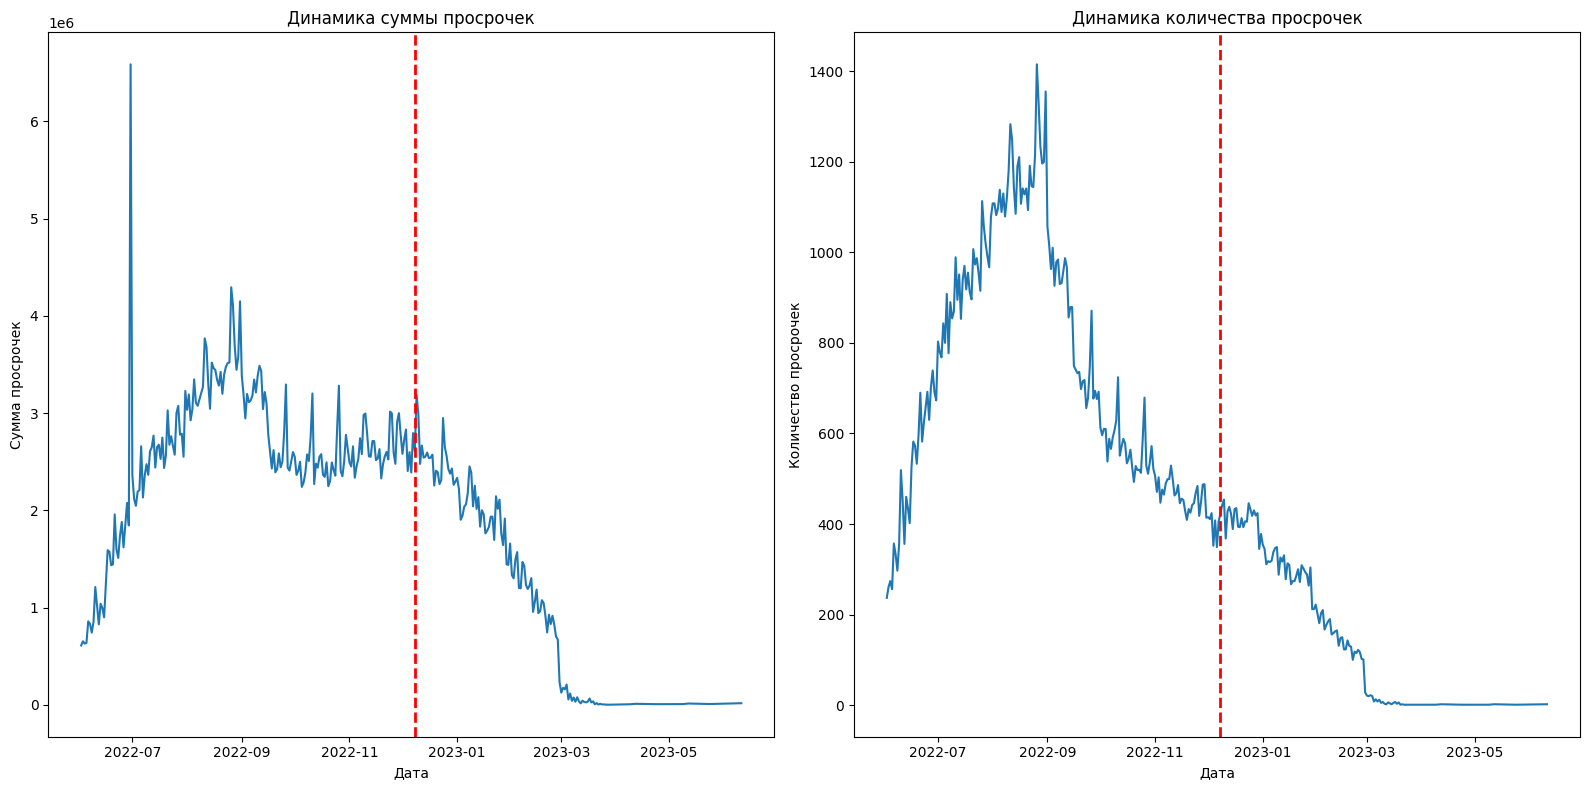

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

overdue_trend['plan_at'] = overdue_trend['plan_at'].dt.to_timestamp()

sns.lineplot(ax=axes[0], x='plan_at', y='overdue_amount', data=overdue_trend)
axes[0].axvline(x=pd.to_datetime('2022-12-08'), color='red', linestyle='--', linewidth=2)
axes[0].set_title('Динамика суммы просрочек')
axes[0].set_xlabel('Дата')
axes[0].set_ylabel('Сумма просрочек')

sns.lineplot(ax=axes[1], x='plan_at', y='overdue_count', data=overdue_trend)
axes[1].axvline(x=pd.to_datetime('2022-12-08'), color='red', linestyle='--', linewidth=2)
axes[1].set_title('Динамика количества просрочек')
axes[1].set_xlabel('Дата')
axes[1].set_ylabel('Количество просрочек')

plt.tight_layout()
plt.show()

Просрочки сначала растут, затем падают (видимо люди активнее закрывают кредиты под конец плана)

Еще виден выброс в данных. Либо ошибка в данных, либо очень серьезный должник :)

In [19]:
print(f"Всего плановых платежей: {len(grouped)}")
print(f"Просроченных платежей: {grouped['overdue'].sum()} ({grouped['overdue'].mean():.1%})")
print(f"Средняя сумма просрочки: {grouped['overdue_amount'].mean():.2f}")

Всего плановых платежей: 188792
Просроченных платежей: 162289 (86.0%)
Средняя сумма просрочки: 3409.84
